<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/PayGap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
gender = read.csv(url("https://gender-pay-gap.service.gov.uk/viewing/download-data/2021"))
names(gender)

[1] "EmployerName"              "EmployerId"               
 [3] "Address"                   "PostCode"                 
 [5] "CompanyNumber"             "SicCodes"                 
 [7] "DiffMeanHourlyPercent"     "DiffMedianHourlyPercent"  
 [9] "DiffMeanBonusPercent"      "DiffMedianBonusPercent"   
[11] "MaleBonusPercent"          "FemaleBonusPercent"       
[13] "MaleLowerQuartile"         "FemaleLowerQuartile"      
[15] "MaleLowerMiddleQuartile"   "FemaleLowerMiddleQuartile"
[17] "MaleUpperMiddleQuartile"   "FemaleUpperMiddleQuartile"
[19] "MaleTopQuartile"           "FemaleTopQuartile"        
[21] "CompanyLinkToGPGInfo"      "ResponsiblePerson"        
[23] "EmployerSize"              "CurrentName"              
[25] "SubmittedAfterTheDeadline" "DueDate"                  
[27] "DateSubmitted"

Number of outliers: 2.

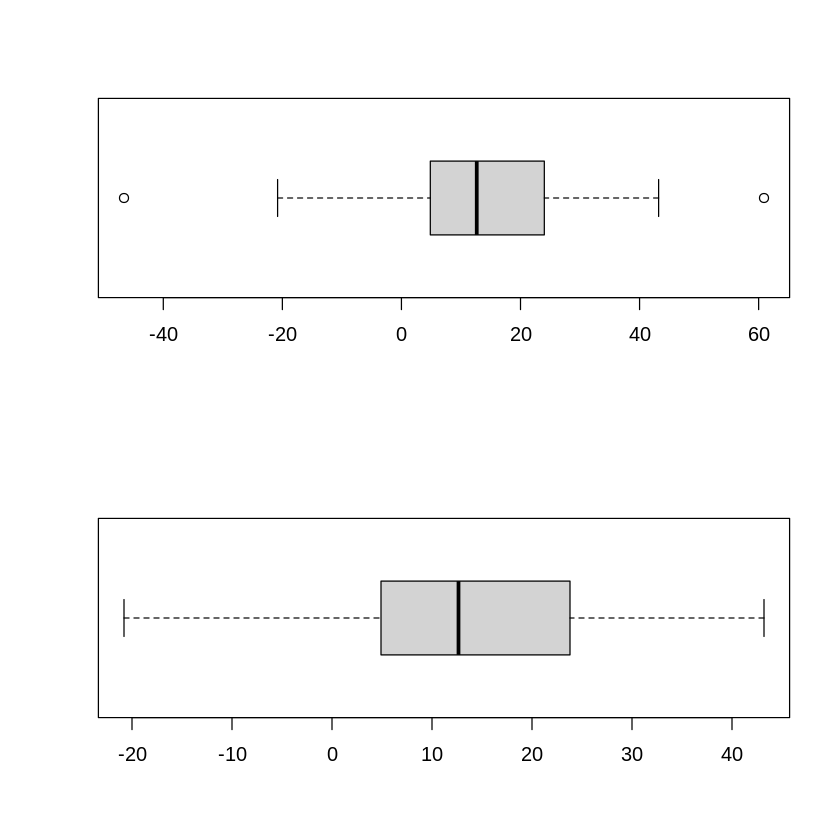

In [174]:
gender$column = gender$DiffMeanHourlyPercent
sample_size   = 100

focus = subset(gender, !is.na(gender$column))
selection = sample(1:length(focus$column), sample_size)
mydata = focus[selection,]

glance = summary(mydata$column)
first = as.numeric(glance[2])
third = as.numeric(glance[5])
lb = first - 1.5*(third - first)
ub = third + 1.5*(third - first)
outliers = subset(mydata, mydata$column < lb | mydata$column > ub)
insides = subset(mydata, mydata$column >= lb & mydata$column <= ub)
cat(sep="", "Number of outliers: ", length(outliers$column),".")

par(mfrow=c(2,1))
boxplot(mydata$column, horizontal=T)
boxplot(insides$column, horizontal=T)

In [166]:
str(gender$column)

 NULL
